# This notebook is to analyse and discover relation between prescription costs of a practice against its patient list size.
## As part of the analysis - latest datasets of Dec 2017 are considered for both. The primary focus is whether the patient list can be used to correlate with the cost.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Area Q59 prescription cost versus patient list size analysis

In [2]:
# Presctiption Cost (filter from actual prescription cost data for Dec 17)
Q59PrescrptionData = pd.read_csv('./Q59_Costs.csv', sep=',', encoding = "ISO-8859-1")
Q59PrescrptionData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
0,C82001,14402,96306.93,89481.98,857459,299542320
1,C82002,11873,119906.55,111333.82,1068837,304383408
2,C82003,19968,126706.64,118177.38,1245757,341094992
3,C82005,15567,116893.35,108619.93,1241207,292885824
4,C82007,15529,142729.64,132746.63,1670355,340288144


In [3]:
# Patient list size (filter from actual patient list size data for Oct-Dec 17)
Q59PatientSizeData = pd.read_csv('./Q59_PatientListSizes.csv', sep=',', encoding = "ISO-8859-1")
Q59PatientSizeData.head()

,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,Area Team Code,PCO Name,PCO Code,Practice Name,Practice Code,Male 0-4,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,3066,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,BUSHLOE SURGERY,C82013,311,...,636,736,745,685,716,611,751,509,643,10808
1,3067,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,COUNTESTHORPE HEALTH CENTRE,C82002,302,...,654,773,808,708,718,651,705,403,499,10630
2,3068,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,COUNTY PRACTICE,C82042,318,...,720,897,890,759,794,729,773,509,623,11904
3,3069,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,EMPINGHAM MEDICAL CENTRE,C82044,166,...,396,453,562,463,469,462,512,308,355,6469
4,3070,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,ENDERBY MEDICAL CENTRE,C82631,248,...,453,468,490,369,336,248,225,128,165,6243


In [4]:
Q59PatientSlice = Q59PatientSizeData.loc[:, 'Practice Code':]

In [5]:
# Merge both prescription and patient list size data for Q59
Q59MergedData = Q59PrescrptionData.merge(Q59PatientSlice, left_on='PRACTICE', right_on='Practice Code', how='inner')
Q59MergedData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Practice Code,Male 0-4,Female 0-4,Male 5-14,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,C82001,14402,96306.93,89481.98,857459,299542320,C82001,265,242,622,...,634,770,788,615,646,538,580,355,470,9410
1,C82002,11873,119906.55,111333.82,1068837,304383408,C82002,302,285,618,...,654,773,808,708,718,651,705,403,499,10630
2,C82003,19968,126706.64,118177.38,1245757,341094992,C82003,303,318,640,...,709,879,859,677,733,570,621,510,649,11396
3,C82005,15567,116893.35,108619.93,1241207,292885824,C82005,311,317,598,...,626,580,677,492,492,372,398,242,362,9237
4,C82007,15529,142729.64,132746.63,1670355,340288144,C82007,249,252,515,...,614,815,766,685,630,628,637,386,437,9653


## Scatter plot of patient list vs cost with regression

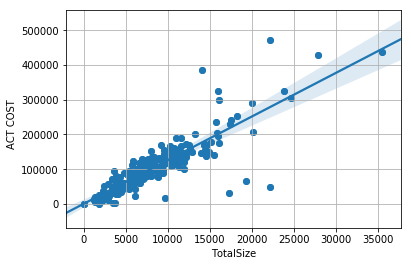

In [6]:
x = Q59MergedData['TotalSize']
y = Q59MergedData['ACT COST   ']
s = Q59MergedData['ACT COST   '].count() * 10 + Q59MergedData['ACT COST   '].max() + 100
ax = plt.gca()
ax.grid(True)
plt.scatter(x, y)
plt.xlabel("Practice Size")
plt.ylabel("Practice total cost")
sns.regplot(x='TotalSize', y='ACT COST   ', data=Q59MergedData)
plt.show()

### From the above graph its evident that they are practices which have higher or lower cost in comparision to regression line. These practices are of interest of the differences.

## Prescription cost vs Patient list size comparision at UK level
### The datasets are generated from the main datasets

In [5]:
# Prescription cost at UK level
UKPrescrptionCosts = pd.read_csv('./UK_PracticeCosts.csv', sep=',', encoding = "ISO-8859-1")
UKPrescrptionCosts.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
0,A81001,8012,62724.13,58415.88,701101,230153392
1,A81002,37730,303726.61,283142.36,2727979,437916752
2,A81004,17127,141415.65,131557.63,1389141,326773440
3,A81005,16155,106384.64,99121.44,917147,292684112
4,A81006,28565,205637.39,191342.94,1862637,370141520


In [6]:
# Practice lists at UK level
UKPracticeListTotals = pd.read_csv('./UK_PracticeListSize.csv', sep=',', encoding = "ISO-8859-1")
UKPracticeListTotals.head()

,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,Area Team Code,PCO Name,PCO Code,Practice Name,Practice Code,Male 0-4,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,0,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,ABBEY MEDICAL CENTRE,F82625,305,...,521,499,392,275,188,134,120,74,86,6891
1,1,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,BARKING MEDICAL GROUP PRACTICE,F82018,479,...,863,709,732,531,471,273,321,214,356,11558
2,2,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,CHILD & FAMILY HEALTH CENTRE,Y02583,636,...,1052,574,415,207,204,55,68,21,51,11037
3,3,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A ARIF,F86040,181,...,357,347,219,185,162,88,99,67,84,4258
4,4,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A MOGHAL'S PRACTICE,F82677,245,...,508,450,464,242,237,149,147,94,143,6299


### Merge the data of costs and patient list

In [7]:
UKMergedData = UKPrescrptionCosts.merge(UKPracticeListTotals, left_on='PRACTICE', right_on='Practice Code', how='inner')
UKMergedData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,A81001,8012,62724.13,58415.88,701101,230153392,4002,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,215,264,297,248,248,230,239,211,268,4144
1,A81002,37730,303726.61,283142.36,2727979,437916752,3996,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,986,1436,1504,1437,1424,1086,1144,816,1178,19965
2,A81004,17127,141415.65,131557.63,1389141,326773440,4047,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,484,657,576,636,579,461,467,377,536,9759
3,A81005,16155,106384.64,99121.44,917147,292684112,4069,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,442,534,566,531,577,599,653,421,534,7993
4,A81006,28565,205637.39,191342.94,1862637,370141520,4000,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,793,996,976,954,980,687,759,435,617,13956


## Scatter plot of patient list vs cost with regression at UK level

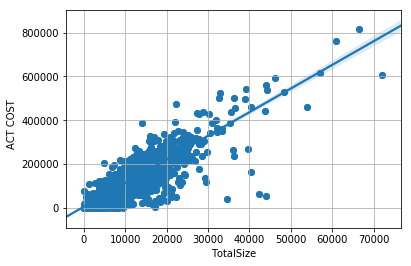

In [8]:
maxSize = UKMergedData['TotalSize'].max()
maxCost = UKMergedData['ACT COST   '].max()
x = UKMergedData['TotalSize']
y = UKMergedData['ACT COST   ']
s = maxCost * 10 + 100

ax = plt.gca()
ax.grid(True)

plt.scatter(x, y)
plt.xlabel("Practice Size")
plt.ylabel("Practice total cost")

sns.regplot(x='TotalSize', y='ACT COST   ', data=UKMergedData)

plt.show()

### From the above graph its evident that they are practices which have higher or lower cost in comparision to regression line. These practices are of interest of the differences.
### Specifically the number of practices of patient list between 0-10000 and 10000-~26500 are of interest.

In [9]:
UKMergedData.describe()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0,Male 0-4,Female 0-4,Male 5-14,Female 5-14,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
count,7268.000000,7268.000000,7268.000000,7.268000e+03,7.268000e+03,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,...,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000
mean,12527.842323,99219.375158,92363.922943,9.652345e+05,2.668742e+08,3669.558613,233.864612,222.352229,483.533847,460.678866,...,525.831591,581.546505,554.741057,468.736241,461.380848,372.948954,395.733489,269.428041,362.857182,8079.086819
std,8671.485006,67286.830328,62609.161428,6.582170e+05,8.944495e+07,2112.210823,156.537537,148.872207,312.771970,297.837971,...,350.957961,364.136179,361.212964,302.661886,309.617477,274.644217,297.464406,209.583850,285.926490,5095.901113
min,1.000000,1.310000,1.330000,2.800000e+01,2.017120e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,6419.000000,50361.167500,46934.532500,4.876455e+05,2.041325e+08,1848.750000,124.000000,118.000000,264.000000,253.000000,...,278.000000,320.000000,291.000000,249.000000,235.000000,168.000000,172.000000,113.000000,148.000000,4458.750000
50%,10638.500000,86008.545000,79987.075000,8.299485e+05,2.656547e+08,3669.500000,202.000000,192.000000,428.000000,406.000000,...,452.000000,514.000000,486.000000,411.000000,403.000000,310.000000,329.000000,220.000000,296.000000,7166.500000
75%,16593.250000,133539.427500,124219.400000,1.300578e+06,3.279837e+08,5495.250000,306.000000,293.000000,635.000000,606.000000,...,690.000000,766.000000,749.000000,625.000000,622.000000,514.000000,549.000000,373.000000,504.000000,10592.250000
max,110047.000000,877130.610000,816097.540000,1.002940e+07,7.818357e+08,7326.000000,2063.000000,1946.000000,4236.000000,3998.000000,...,5859.000000,5333.000000,4667.000000,3975.000000,3827.000000,3380.000000,3566.000000,2514.000000,3504.000000,72151.000000


### Based on the distribution of data, total number of practices are consideration is 7628.
### To decrease the data size, lets consider practices between 25% and 75% i.e. patient list between 4400 & 10600.
### The number of practices reduces to 1812

In [10]:
# Consider patient list size between 25% to 75% percentile
Percent25 = 4400
Percent75 = 10600
PatientSizeFilter1 = UKMergedData['TotalSize'] >= Percent25
PatientSizeFilter2 = UKMergedData['TotalSize'] <= Percent75
PatientSizeFilterData = UKMergedData[PatientSizeFilter1 & PatientSizeFilter2]
PatientSizeFilterData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
2,A81004,17127,141415.65,131557.63,1389141,326773440,4047,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,484,657,576,636,579,461,467,377,536,9759
3,A81005,16155,106384.64,99121.44,917147,292684112,4069,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,442,534,566,531,577,599,653,421,534,7993
5,A81007,17030,130218.34,121393.84,1221708,298533760,3979,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,569,708,718,613,652,482,498,338,545,10034
6,A81009,17320,122328.36,113875.23,1277437,307610800,4083,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,494,647,675,576,579,362,402,265,355,8843
8,A81012,13349,86690.28,80906.77,899804,260813616,4084,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,252,351,307,325,309,179,157,140,174,4771


## Scatter plot of patient list vs cost with regression (25% to 75% percentiles)

(3685, 34)


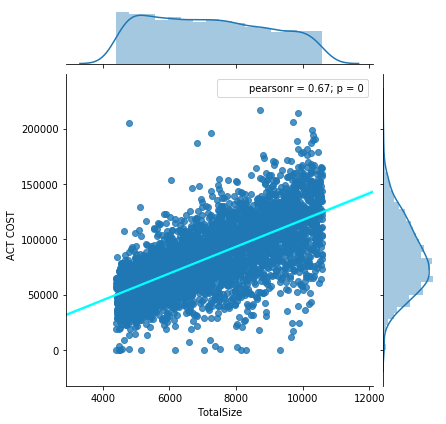

In [11]:
maxSize = PatientSizeFilterData['TotalSize'].max()
maxCost = PatientSizeFilterData['ACT COST   '].max()

sns.jointplot(x="TotalSize", y="ACT COST   ", data=PatientSizeFilterData, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})
print(PatientSizeFilterData.shape)
plt.show()

## Above graph validates the understanding that practices of size between 4400 & 10600 have higher difference in costs. Further analysis needs to be done to understand the reasons for these differences.

In [12]:
UKMergedData['PerPatient_NIC'] = UKMergedData['NIC        ']/UKMergedData['TotalSize']
UKMergedData['PerPatient_ActCost'] = UKMergedData['ACT COST   ']/UKMergedData['TotalSize']

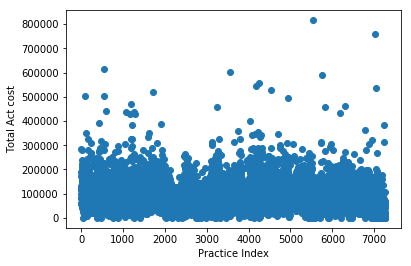

In [13]:
# Scatter plot of per-patient act cost for UK

x = np.arange(0, UKMergedData['ACT COST   '].count(), 1.0)
y = UKMergedData['ACT COST   ']

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Total Act cost")
plt.show()

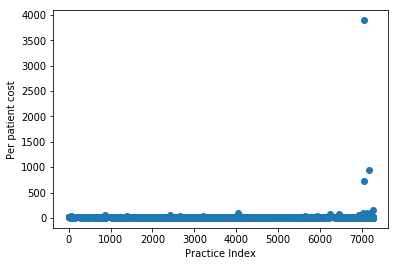

In [14]:
# Scatter plot of per-patient act cost for UK

x = np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = UKMergedData['PerPatient_ActCost']

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Per patient cost")
plt.show()

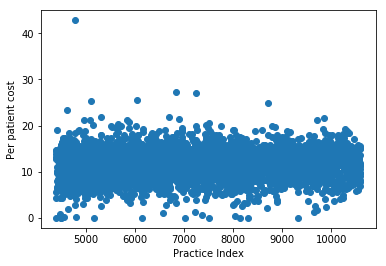

In [16]:
# Scatter plot of per-patient act cost for UK
PerPFilter = UKMergedData['PerPatient_ActCost'] < 500

PerPFilter25 = UKMergedData['TotalSize'] >= Percent25
PerPFilter75 = UKMergedData['TotalSize'] <= Percent75

PerPFilterData = UKMergedData[PerPFilter & PerPFilter25 & PerPFilter75]
x = PerPFilterData['TotalSize'] #np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = PerPFilterData['PerPatient_ActCost']

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Per patient cost")
plt.show()

In [21]:
 UKMergedData['PerPatient_ActCost'].describe()

count    7268.000000
mean       12.357666
std        47.775240
min         0.000254
25%         9.425481
50%        11.683413
75%        13.602211
max      3892.912000
Name: PerPatient_ActCost, dtype: float64